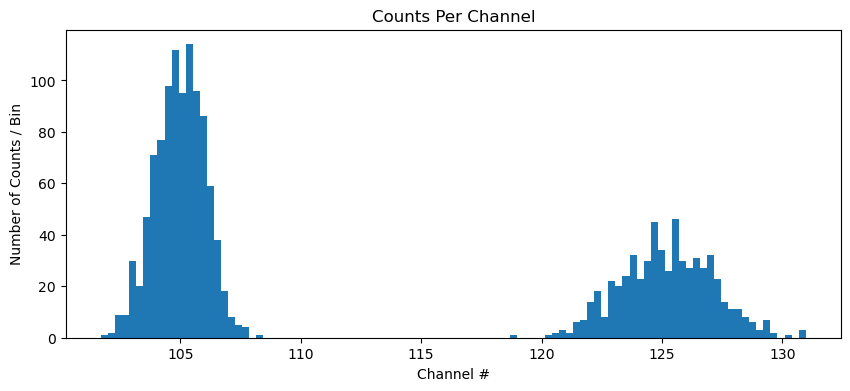

In [85]:
import numpy as np
import matplotlib.pyplot as plt


peak1 = np.random.normal(105,1,1000)
peak2 = np.random.normal(125,2,600)

peakboth = np.concatenate((peak1,peak2))

plt.figure(figsize=(10,4))
plt.hist(peakboth,100)
plt.title("Counts Per Channel")
plt.xlabel("Channel #")
plt.ylabel("Number of Counts / Bin")
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

peak1 = np.random.normal(100,1,1000)
peak2 = np.random.normal(120,2,600)

peakboth = np.concatenate((peak1,peak2))

count, bin_edges = np.histogram(peakboth,100)
print(count)
print(bin_edges)

[  2   4  14  11  28  40  73  84 109 111 126 104  88  85  53  32  21   6
   5   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   1   0   2   0   2   1   3   3   9   7   8  14  15  25  23  23
  29  29  41  32  42  33  31  42  30  28  19  28  14  19  10  10  15   5
   1   1   2   1   1   0   0   0   0   1]
[ 96.97738488  97.27586298  97.57434108  97.87281918  98.17129728
  98.46977538  98.76825348  99.06673158  99.36520968  99.66368778
  99.96216588 100.26064398 100.55912208 100.85760018 101.15607828
 101.45455638 101.75303448 102.05151258 102.34999068 102.64846878
 102.94694688 103.24542498 103.54390308 103.84238118 104.14085928
 104.43933738 104.73781547 105.03629357 105.33477167 105.63324977
 105.93172787 106.23020597 106.52868407 106.82716217 107.12564027
 107.42411837 107.72259647 108.02107457 108.31955267 108.61803077
 108.91650887 109.21498697 109.51346507 109.81194317 110.11042127

In [30]:
import numpy as np
import matplotlib.pyplot as plt

peak1 = np.random.normal(100,1,1000)
peak2 = np.random.normal(120,2,600)

peakboth = np.concatenate((peak1,peak2))

count, bin_edges = np.histogram(peakboth,100)

bin_centers =[]
for ie in range(1,len(bin_edges)):
    bin_centers.append((bin_edges[ie]+bin_edges[ie-1])/2)

    
print(bin_centers)
print(bin_edges)

[96.84235469318764, 97.14195037535255, 97.44154605751746, 97.74114173968238, 98.0407374218473, 98.3403331040122, 98.63992878617711, 98.93952446834203, 99.23912015050695, 99.53871583267184, 99.83831151483676, 100.13790719700168, 100.43750287916659, 100.73709856133149, 101.03669424349641, 101.33628992566133, 101.63588560782622, 101.93548128999115, 102.23507697215607, 102.53467265432097, 102.83426833648588, 103.1338640186508, 103.43345970081572, 103.73305538298062, 104.03265106514553, 104.33224674731045, 104.63184242947537, 104.93143811164026, 105.23103379380518, 105.5306294759701, 105.83022515813501, 106.12982084029991, 106.42941652246483, 106.72901220462975, 107.02860788679465, 107.32820356895957, 107.62779925112449, 107.92739493328939, 108.2269906154543, 108.52658629761922, 108.82618197978414, 109.12577766194903, 109.42537334411395, 109.72496902627887, 110.02456470844378, 110.32416039060868, 110.6237560727736, 110.92335175493852, 111.22294743710343, 111.52254311926833, 111.822138801433

<ErrorbarContainer object of 3 artists>

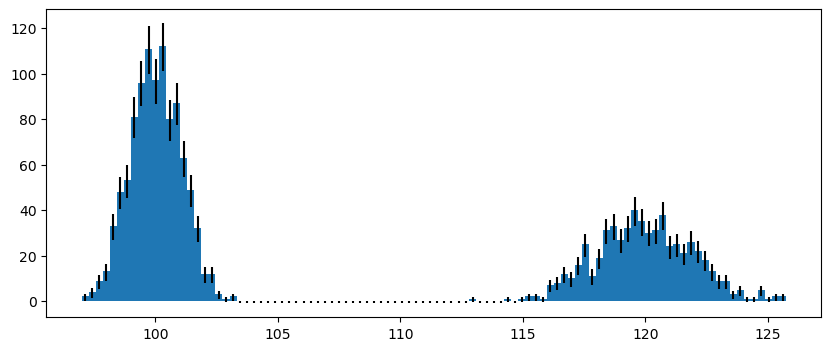

In [88]:
import numpy as np
import matplotlib.pyplot as plt

peak1 = np.random.normal(100,1,1000)
peak2 = np.random.normal(120,2,600)

peakboth = np.concatenate((peak1,peak2))

count, bin_edges = np.histogram(peakboth,100)
bin_centers =[]
for ie in range(1,len(bin_edges)):
    bin_centers.append((bin_edges[ie]+bin_edges[ie-1])/2)

ErrPlus = 0.5+np.sqrt(count+0.25)
ErrMinus = -0.5+np.sqrt(count+0.25)

plt.figure(figsize=(10,4))
plt.hist(peakboth,100)
#plt.yscale("log")
plt.errorbar(bin_centers,count,[ErrPlus,ErrMinus],
         ls='',marker='', mfc='k',ms=10,mec='k',ecolor='k',label="Histogram Bars")


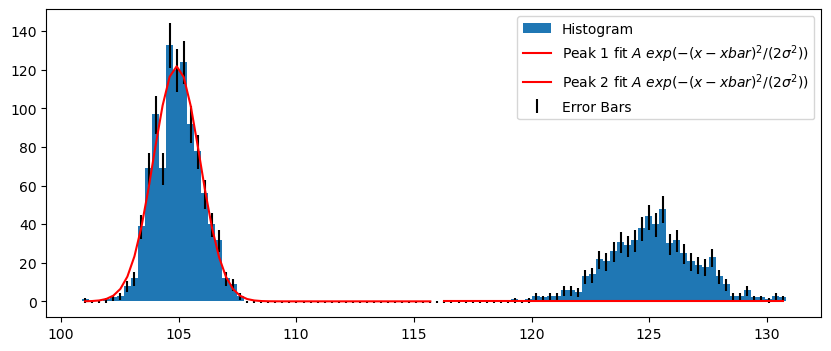

In [101]:
import numpy as np
import matplotlib.pyplot as plt

peak1 = np.random.normal(105,1,1000)
peak2 = np.random.normal(125,2,600)

peakboth = np.concatenate((peak1,peak2))

count, bin_edges = np.histogram(peakboth,100)
bin_centers =[]
for ie in range(1,len(bin_edges)):
    bin_centers.append((bin_edges[ie]+bin_edges[ie-1])/2)

ErrPlus = 0.5+np.sqrt(count+0.25)
ErrMinus = -0.5+np.sqrt(count+0.25)


plt.figure(figsize=(10,4))
plt.hist(peakboth,100, label="Histogram")
#plt.yscale("log")
plt.errorbar(bin_centers,count,[ErrPlus,ErrMinus],
         ls='',marker='', mfc='k',ms=10,mec='k',ecolor='k',label="Error Bars")

from scipy.optimize import curve_fit
def GausFit(x,xbar,sigma,A):
    return A*np.exp(-(x-xbar)**2/(2*sigma**2))

param0 = (100,2,700)
paramfit1, paramErr1 = curve_fit(GausFit,
                               bin_centers[0:50],
                               count[0:50],
                               param0)

FitPeak1 = GausFit(bin_centers[0:50],paramfit1[0],paramfit1[1],paramfit1[2])
plt.plot(bin_centers[0:50],FitPeak1,"r",label="Peak 1 fit $A~exp(-(x-xbar)^2/(2\sigma^2))$")


param0 = (120,1,500)
paramfit2, paramErr2 = curve_fit(GausFit,
                               bin_centers[51:],
                               count[51:],
                               param0)


FitPeak2 = GausFit(bin_centers[51:],paramfit2[0],paramfit2[1],paramfit2[2])
plt.plot(bin_centers[51:],FitPeak2,"r",label="Peak 2 fit $A~exp(-(x-xbar)^2/(2\sigma^2))$")

plt.legend()


[104.91709867   0.98624425 121.7637979 ]
[[ 1.01393457e-03 -1.22094565e-09  1.23502884e-07]
 [-1.22094565e-09  1.01393617e-03 -6.25912049e-02]
 [ 1.23502884e-07 -6.25912049e-02  1.15914251e+01]]
[125.11165037   1.81073178  39.04374067]
[[ 3.45263703e-03  9.51213506e-07 -9.25959704e-06]
 [ 9.51213506e-07  3.45536621e-03 -3.72500464e-02]
 [-9.25959704e-06 -3.72500464e-02  1.20413748e+00]]


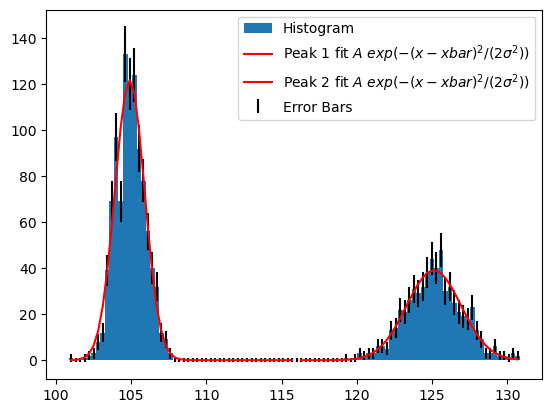

In [102]:
import numpy as np
import matplotlib.pyplot as plt


count, bin_edges = np.histogram(peakboth,100)
bin_centers =[]
for ie in range(1,len(bin_edges)):
    bin_centers.append((bin_edges[ie]+bin_edges[ie-1])/2)

ErrPlus = 0.5+np.sqrt(count+0.25)
#ErrMinus = -0.5+np.sqrt(count+0.25)

plt.hist(peakboth,100, label="Histogram")
#plt.yscale("log")
plt.errorbar(bin_centers,count,ErrPlus,
         ls='',marker='', mfc='k',ms=10,mec='k',ecolor='k',label="Error Bars")

from scipy.optimize import curve_fit
def GausFit(x,xbar,sigma,A):
    return A*np.exp(-(x-xbar)**2/(2*sigma**2))

param0 = (100,1,1000)
paramfit1, paramErr1 = curve_fit(GausFit,
                               bin_centers[0:50],
                               count[0:50],
                               param0)


FitPeak1 = GausFit(bin_centers[0:50],paramfit1[0],paramfit1[1],paramfit1[2])
plt.plot(bin_centers[0:50],FitPeak1,"r",label="Peak 1 fit $A~exp(-(x-xbar)^2/(2\sigma^2))$")


param0 = (125,1,500)
paramfit2, paramErr2 = curve_fit(GausFit,
                               bin_centers[51:],
                               count[51:],
                               param0)


FitPeak2 = GausFit(bin_centers[51:],paramfit2[0],paramfit2[1],paramfit2[2])
plt.plot(bin_centers[51:],FitPeak2,"r",label="Peak 2 fit $A~exp(-(x-xbar)^2/(2\sigma^2))$")

plt.legend()
print(paramfit1)
print(paramErr1)
print(paramfit2)
print(paramErr2)

The peak center of the peak 1 is $105.02\pm0.02$

The peak center of the peak 2 is $125.2\pm0.1$

We know that these peaks corresponds to  $\lambda = 400. nm$ and $\lambda = 500. nm$

So the pairs are,

(105.02, 400.)

(125.2, 500.)

Converting the channel number to wavelength, we use $y =mx+b$

m = (500.-400.)/(125.2-105.02) = 4.96

The uncertainty of this result must be propagated.

$$ \delta w = \sqrt{(\frac{\partial w}{\partial x}\delta x)^2+(\frac{\partial w}{\partial y}\delta y)^2+(\frac{\partial w}{\partial z}\delta z)^2}$$

This is often a lot easier to do on paper.

....




The result should be...

$m = 4.96\pm 0.04$

Similarly, plugging will find that...

$b = -121.5\pm0.1$

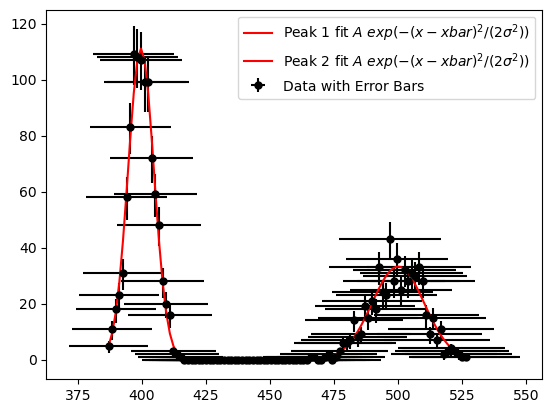

In [84]:
wavelength = np.array(bin_centers)*4.96-121

wavelength_err = np.sqrt((wavelength*0.04)**2+0.1**2)

plt.errorbar(wavelength,count,[ErrPlus,ErrMinus],wavelength_err,
         ls='',marker='.', mfc='k',ms=10,mec='k',ecolor='k',label="Data with Error Bars")

param0 = (400,1,1000)
paramfit1, paramErr1 = curve_fit(GausFit,
                               wavelength[0:50],
                               count[0:50],
                               param0)


FitPeak1 = GausFit(wavelength[0:50],paramfit1[0],paramfit1[1],paramfit1[2])
plt.plot(wavelength[0:50],FitPeak1,"r",label="Peak 1 fit $A~exp(-(x-xbar)^2/(2\sigma^2))$")


param0 = (500,1,500)
paramfit2, paramErr2 = curve_fit(GausFit,
                               wavelength[51:],
                               count[51:],
                               param0)


FitPeak2 = GausFit(wavelength[51:],paramfit2[0],paramfit2[1],paramfit2[2])
plt.plot(wavelength[51:],FitPeak2,"r",label="Peak 2 fit $A~exp(-(x-xbar)^2/(2\sigma^2))$")
plt.legend()